In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import matplotlib

!pip install matplotlib==3.7.3
#ignore cell, just fixes a problem with matplotlib

  Using cached matplotlib-3.7.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.9.1
    Uninstalling matplotlib-3.9.1:
      Successfully uninstalled matplotlib-3.9.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
leafmap 0.36.1 requires matplotlib>=3.9.1, but you have matplotlib 3.7.3 which is incompatible.


In [8]:
# LOADING IN OBESITY BY CITY AND STATE DATA
obesity_cities = pd.read_csv("500_Cities__Obesity_among_adults_aged___18_years_20240728.csv")
obesity_and_cities = obesity_cities[["StateDesc", "CityName", "Data_Value"]]
#obesity_and_cities.to_csv('out.csv', index=False)  

In [10]:
sorted_obesity_and_cities = obesity_and_cities.groupby(["StateDesc", "CityName"]).mean()
sorted_obesity_and_cities

Data_Value
StateDesc CityName              
Alabama   Birmingham   40.329348
          Hoover       29.160000
          Huntsville   35.896667
          Mobile       38.803896
          Montgomery   39.204839
...                          ...
Wisconsin Madison      26.304478
          Milwaukee    35.874299
          Racine       39.504167
          Waukesha     30.763636
Wyoming   Cheyenne     29.205556

[500 rows x 1 columns]

In [68]:
# CITIES WITH THE HIGHEST PREVALENCE OF OBESITY
highest_prevalence = sorted_obesity_and_cities.sort_values(by=["Data_Value"], ascending=False).head(50)
highest_prevalence

Data_Value
StateDesc     CityName                 
Indiana       Gary            50.042424
Michigan      Flint           48.678049
Ohio          Youngstown      45.463636
Michigan      Detroit         44.812245
Texas         Pharr           44.654545
Ohio          Toledo          44.304950
New Jersey    Camden          44.114286
Texas         Edinburg        43.446667
              Laredo          43.064407
Ohio          Dayton          42.967797
Pennsylvania  Reading         42.668966
Texas         Mission         42.623529
Ohio          Canton          42.310714
              Cleveland       42.266102
Texas         Brownsville     42.034000
              McAllen         41.962963
Kansas        Kansas City     41.461290
Georgia       Albany          41.255556
              Macon           41.100000
Louisiana     Shreveport      40.786885
Alabama       Birmingham      40.329348
Virginia      Portsmouth      39.984848
New Jersey    Newark          39.640449
Texas         Beaumont        39.622222
Delaware      Wilmington      39.573077
Maryland      Baltimore       39.562189
Pennsylvania  Allentown       39.532143
Wisconsin     Racine          39.504167
Georgia       Columbus        39.501818
Mississippi   Jackson         39.443636
New Jersey    Trenton         39.422222
Texas         Wichita Falls   39.384848
Indiana       Hammond         39.295238
Tennessee     Memphis         39.291111
West Virginia Charleston      39.287500
Alabama       Montgomery      39.204839
Georgia       Augusta         38.871429
Iowa          Des Moines      38.805000
Alabama       Mobile          38.803896
Virginia      Hampton         38.757143
Indiana       South Bend      38.467391
Illinois      Peoria          38.457895
Iowa          Davenport       38.415152
Oklahoma      Lawton          38.413333
New York      Rochester       38.325926
Illinois      Decatur         38.145161
Ohio          Akron           38.142647
Florida       Miami Gardens   37.864000
Georgia       Warner Robins   37.819048
Kansas        Topeka          37.665000

In [67]:
# CITIES WITH THE LOWEST PREVALENCE OF OBESITY
lowest_prevalence = sorted_obesity_and_cities.sort_values(by=["Data_Value"], ascending=True).head(50)
lowest_prevalence

Data_Value
StateDesc     CityName                    
Colorado      Boulder            15.383333
California    Milpitas           15.800000
              Irvine             16.121622
              Fremont            16.762222
              Sunnyvale          16.900000
              Daly City          17.422727
              Santa Clara        17.634615
              Alhambra           17.754545
              Torrance           17.953125
              San Francisco      18.046701
              Westminster        18.112500
Washington    Bellevue           18.113333
Colorado      Longmont           18.345000
California    Union City         18.388889
              Newport Beach      18.530435
              San Ramon          18.723529
              Mountain View      18.731818
              Redondo Beach      19.633333
              Mission Viejo      19.636000
              Pleasanton         19.768750
New Mexico    Santa Fe           19.946667
California    Lake Forest        20.033333
              Carlsbad           20.113636
              Huntington Beach   20.160417
              Fullerton          20.171429
              Santa Monica       20.180952
              Garden Grove       20.204545
              Alameda            20.338889
              Thousand Oaks      20.413333
              San Jose           20.426047
Massachusetts Newton             20.655000
California    Berkeley           20.734286
              Buena Park         20.805000
              Tustin             20.830000
              San Mateo          20.832143
              Orange             20.925000
Washington    Seattle            20.956618
Colorado      Denver             21.028276
Florida       Boca Raton         21.068966
California    West Covina        21.073529
Georgia       Johns Creek        21.093750
Massachusetts Cambridge          21.450000
Colorado      Fort Collins       21.516667
              Centennial         21.575676
              Arvada             21.582857
              Lakewood           21.615909
California    Roseville          21.661290
              Simi Valley        21.750000
              Glendale           21.955814
              Costa Mesa         21.977778

Text(0, 0.5, 'Obesity Prevalence in Adults (%)')

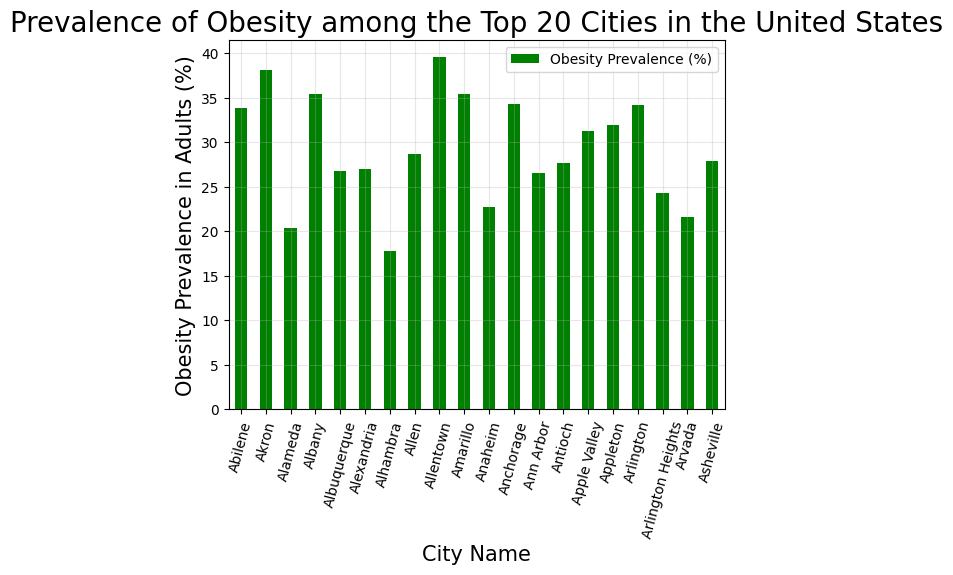

In [91]:
#fg = sns.FacetGrid(data=sorted_obesity_and_cities, hue='CityName', hue_order=CityName, aspect=1.61)
#fg.map(plt.scatter, 'CityName', 'Data_Value').add_legend()
new_df = obesity_cities[["CityName", "Data_Value"]]
new_df = new_df.rename(columns={"Data_Value": "Obesity Prevalence (%)"})
new_df = new_df.sort_values(by=["Obesity Prevalence (%)"], ascending=False).groupby(["CityName"]).mean().head(20)
new_df.plot.bar(rot=75, color="green")
plt.grid(alpha=0.3)
plt.title('Prevalence of Obesity among the Top 20 Cities in the United States',fontsize=20)
plt.xlabel('City Name',fontsize=15)
plt.ylabel('Obesity Prevalence in Adults (%)',fontsize=15)

In [92]:
socioeconomic_cities = pd.read_csv("socioeconomic.csv")
ranked_df = socioeconomic_cities[["50 largest metropolitan areas", "Per Capita Personal Income (PCPI) (2019)[2]"]]
ranked_df
#ranked_df.sort_values(by=["Per Capita Personal Income (PCPI) (2019)[2]"], ascending=False)

,50 largest metropolitan areas,Per Capita Personal Income (PCPI) (2019)[2]
0,"1. New York City-Newark-Jersey City, NY-NJ-PA MSA","$79,844"
1,"2. Los Angeles-Long Beach-Anaheim, CA MSA","$66,684"
2,"3. Chicago-Naperville-Elgin, IL-IN-WI MSA","$63,500"
3,"4. Dallas-Fort Worth-Arlington, TX MSA","$58,725"
4,"5. Houston-The Woodlands-Sugar Land, TX MSA","$58,890"
5,"6. Washington-Arlington-Alexandria, DC-VA-MD-W...","$74,385"
6,"7. Miami-Fort Lauderdale-West Palm Beach, FL MSA","$60,966"
7,"8. Philadelphia-Camden-Wilmington, PA-NJ-DE-MD...","$66,596"
8,"9. Atlanta-Sandy Springs-Alpharetta, GA MSA","$54,557"
9,"10. Phoenix-Mesa-Chandler, AZ MSA","$48,065"


In [94]:
# CITIES WITH THE HIGHEST PERSONAL INCOME PER CAPITA (SOCIOECONOMIC STATUS)
ranked_df = ranked_df.rename(columns={"Per Capita Personal Income (PCPI) (2019)[2]": "Personal Income Per Capita ($)"})
ranked_df["Personal Income Per Capita ($)"] = ranked_df.loc[:, "Personal Income Per Capita ($)"].str.replace(',', '').str.replace('$', '').str.replace(' ', '').astype(int)
ranked_df.sort_values(by=["Personal Income Per Capita ($)"], ascending=False)
#ranked_df["Per Capita Personal Income (PCPI) (2019)[2]"] = ranked_df["Per Capita Personal Income (PCPI) (2019)[2]"].astype(str).replace(',', '').replace('$', '')

,50 largest metropolitan areas,Personal Income Per Capita ($)
34,"35. San Jose-Sunnyvale-Santa Clara, CA MSA",114080
11,"12. San Francisco-Oakland-Berkeley, CA MSA",104291
10,"11. Boston-Worcester-Providence, MA-RI-NH-CT CSA",81498
0,"1. New York City-Newark-Jersey City, NY-NJ-PA MSA",79844
14,"15. Seattle-Tacoma-Bellevue, WA MSA",78073
5,"6. Washington-Arlington-Alexandria, DC-VA-MD-W...",74385
18,"19 Denver-Aurora-Lakewood, CO MSA",67236
1,"2. Los Angeles-Long Beach-Anaheim, CA MSA",66684
7,"8. Philadelphia-Camden-Wilmington, PA-NJ-DE-MD...",66596
47,"48. Hartford-East Hartford-Middletown, CT MSA",65152


Text(0, 0.5, 'Personal Income ($)')

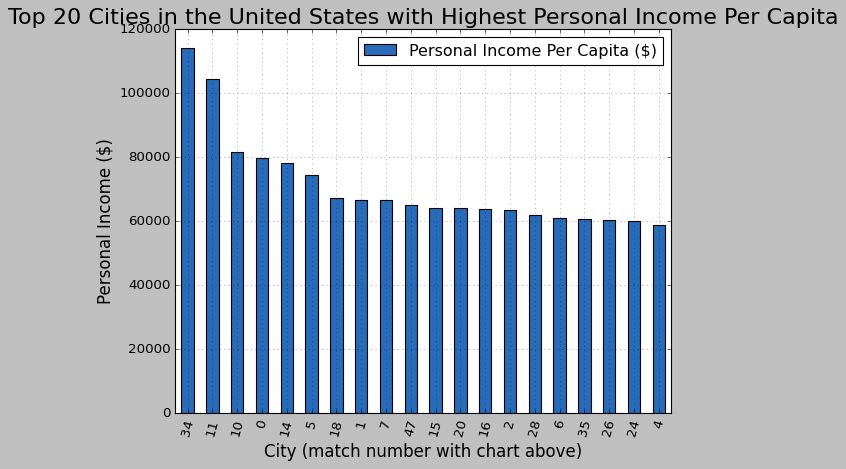

In [105]:
sorted_socioeconomic = ranked_df.sort_values(by=["Personal Income Per Capita ($)"], ascending=False).head(20)
sorted_socioeconomic.plot.bar(label = "50 largest metropolitan areas", rot=75, color="#286bb8")
plt.grid(alpha=0.5)
plt.title('Top 20 Cities in the United States with Highest Personal Income Per Capita',fontsize=20)
plt.xlabel('City (match number with chart above)',fontsize=15)
plt.ylabel('Personal Income ($)',fontsize=15)

# Eating Habits

In [19]:
eating_habits = pd.read_csv("National_Community_Based_Survey_of_Supports_for_Healthy_Eating_and_Active_Living___CBS_HEAL__20240806.csv")
print(eating_habits.columns.tolist())

['ADAPLAN', 'BIKERACK', 'DESTINAT_A', 'DESTINAT_B', 'DESTINAT_C', 'DESTINAT_D', 'EQPLAN', 'FARMEBT', 'FARMMRKT', 'FARMPOLICY_A', 'FARMPOLICY_B', 'FARMPOLICY_C', 'FARMPOLICY_D', 'FARMPOLICY_E', 'FEMMAT', 'FEMWEEK', 'FEMWORK', 'FOODCOUN', 'FOODSEC', 'GENMANDATE', 'GENPLAN', 'GENPLANUP', 'GENPLANYR', 'GOVSTRUCT_A', 'GOVSTRUCT_B', 'GOVSTRUCT_C', 'GOVSTRUCT_D', 'GOVSTRUCT_E', 'GOVSTRUCT_F', 'HEALTHFOOD_A', 'HEALTHFOOD_B', 'HEALTHFOOD_C', 'HLTHFOODLOW', 'LEADTEST', 'LOCALTAC', 'LOWINCOME', 'NR_adj_wt', 'OBPLAN_A', 'OBPLAN_B', 'OBPLAN_C', 'OBPLAN_D', 'OBPLAN_E', 'OBPLAN_F', 'OBPLAN_G', 'OTHAGREE', 'OTHCONTRACT', 'OTHFOOD', 'OTHGOV', 'OTHOWN', 'OTHPLAN_A', 'OTHPLAN_B', 'OTHPLAN_C', 'OTHPLAN_D', 'OTHPLAN_E', 'OTHSERVE', 'PAGOV_A', 'PAGOV_B', 'PAGOV_C', 'PARKPOL_A', 'PARKPOL_B', 'PARKPOL_C', 'PARKPOL_D', 'PARKPOL_E', 'PARKPOL_F', 'PHCOUNC_A', 'PHCOUNC_B', 'POPULATIONSIZE', 'POVERTY_BINARY', 'PUBAUTH', 'PUBCOMM_A', 'PUBCOMM_B', 'PUBCOMM_C', 'PUBCOMM_D', 'PUBCOMM_E', 'PUBCURRENT', 'PUBDEMAND', 'PU

In [20]:
eating_habits_df = eating_habits[['HEALTHFOOD_A', 'HEALTHFOOD_B', 'HEALTHFOOD_C', 'HLTHFOODLOW', 'LOWINCOME', 'POVERTY_BINARY']]
eating_habits_df

,HEALTHFOOD_A,HEALTHFOOD_B,HEALTHFOOD_C,HLTHFOODLOW,LOWINCOME,POVERTY_BINARY
0,2,2,1,1,97,2
1,2,2,2,97,97,2
2,2,2,2,97,2,2
3,1,1,1,1,97,2
4,2,1,2,1,97,2
...,...,...,...,...,...,...
1977,2,2,2,97,97,2
1978,2,2,2,97,97,2
1979,2,2,2,97,97,2
1980,2,2,2,97,97,2


In [3]:
physical_activity = pd.read_csv("physical_activity.csv")
physical_activity

,Low income,Unnamed: 1,Unnamed: 2,Unnamed: 3,Moderate income,Unnamed: 5,Unnamed: 6,Unnamed: 7,High income,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,"Activity, race/ethnicity",1998–2000\n\n% (SE),2016–2018\n\n% (SE),Changeb\n\n% (SE),Trend,1998–2000\n\n% (SE),2016–2018\n\n% (SE),Changeb\n\n% (SE),Trend,1998–2000\n\n% (SE),2016–2018\n\n% (SE),Changeb\n\n% (SE),Trend
1,Engaging in any aerobic activity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,White,47.9 (0.8),61.6 (0.9),13.7,LQ,60.1 (0.5),72.1 (0.6),12,LQ,72.4 (0.4),85.4 (0.4),13,LQ
3,Black,37.2 (1.0),53.7 (1.3),16.5,LC,48.8 (0.9),65.2 (1.2),16.4,LQ,62.2 (1.3),76.0 (1.5),13.8,L
4,Hispanic,32.3 (0.8),54.8 (1.5),22.5,LC,44.7 (0.8),63.2 (1.3),18.5,LQC,63.1 (1.3),78.6 (1.3),15.5,LQC
5,Meeting aerobic activity guideline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,White,31.3 (0.7),41.5 (0.8),10.2,LQ,40.1 (0.4),50.2 (0.6),10.1,LQ,51.9 (0.4),66.3 (0.5),14.4,LQ
7,Black,23.8 (0.8),35.4 (1.2),11.6,LQC,31.7 (0.8),44.7 (1.2),13,LQ,43.1 (1.3),58.2 (1.5),15.1,L
8,Hispanic,20.3 (0.6),35.9 (1.2),15.6,LQC,29.8 (0.7),44.6 (1.1),14.8,LQC,45.2 (1.3),59.4 (1.4),14.2,LQC
9,Meeting muscle-strengthening guideline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
physical_activity_by_state = pd.read_csv("Physical Activity - Sheet1.csv")
physical_activity_by_state

,State,% of people who exercise,% of people who are obese
0,Colorado,83%,25%
1,Utah,83%,31%
2,Washington,82%,29%
3,Vermont,82%,29%
4,Oregon,80%,30%
5,Hawaii,80%,25%
6,New Hampshire,80%,31%
7,California,80%,28%
8,Minnesota,80%,32%
9,Alaska,80%,34%


In [6]:
income_per_state = pd.read_csv("Income by State - Sheet1.csv")
income_per_state[["State", "Per capita income", "% of people in poverty", "% of 25+ year old people with bachelor or higher degrees"]]

,State,Per capita income,% of people in poverty,% of 25+ year old people with bachelor or higher degrees
0,Alabama,"$30,458",16.10%,26.70%
1,Alaska,"$39,236",10.50%,30.60%
2,Arizona,"$34,644",12.80%,31.20%
3,Arkansas,"$29,210",16.30%,24.30%
4,California,"$41,276",12.30%,35.30%
5,Colorado,"$42,807",9.70%,42.80%
6,Connecticut,"$47,869",10.10%,40.60%
7,Delaware,"$38,917",11.60%,33.60%
8,District of Columbia,"$63,793",16.50%,61.40%
9,Florida,"$35,216",13.10%,31.50%


In [8]:
income_df = income_per_state[["State", "Per capita income"]] #"% of 25+ year old people with bachelor or higher degrees"
income_df.to_csv('state_income.csv', index=False)  

In [9]:
education_df = income_per_state[["State", "% of 25+ year old people with bachelor or higher degrees"]]
education_df.to_csv('state_education.csv', index=False)  

In [7]:
income_per_state = pd.read_csv("sugar - Sheet1.csv")
income_per_state = income_per_state.rename(columns={"Unnamed: 0": "Countries"})
income_per_state.sort_values(by=["Annual per capita sugar consumption (kg)"], ascending=False).head(50)

,Countries,Annual per capita sugar consumption (kg)
0,Luxembourg,166.15
1,Fiji,135.70
2,Suriname,125.35
3,Montenegro,112.32
4,Australia,102.58
5,Iceland,102.31
6,Lithuania,96.84
7,Ireland,96.19
8,Nauru,95.86
9,Macau,94.67
